# Problem

The problem is to classify iris flowers into different species based on their sepal and petal measurements.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Preprocessing

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data visualization 

 Create histograms for each feature to visualize the distribution of values.

In [7]:
types = iris['species'].unique()
types

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

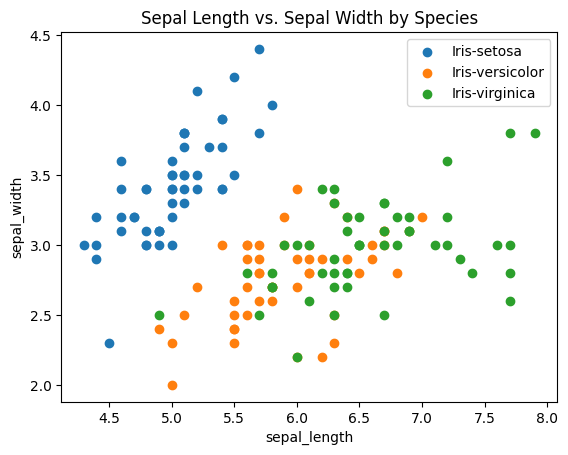

In [8]:
for i in range(3):
    species = iris[iris['species']==iris['species'].unique()[i]]
    plt.scatter(x='sepal_length',y='sepal_width',data=species,label=types[i])
    plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.show()

# visualization 
iris-setosa has lower sepal-length and higher sepal-width compared to other 2 types

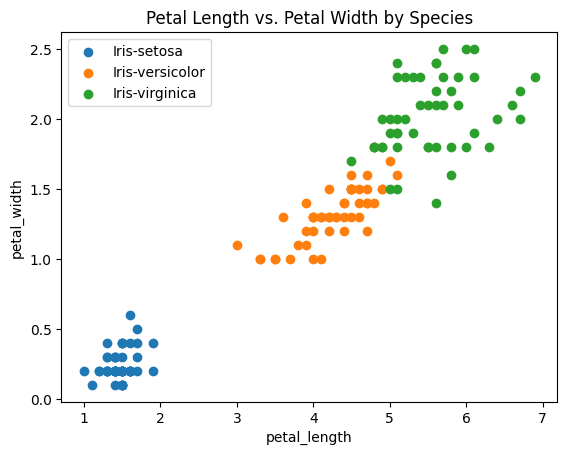

In [9]:
for i in range(3):
    species = iris[iris['species']==iris['species'].unique()[i]]
    plt.scatter(x='petal_length',y='petal_width',data=species,label=types[i])
    plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Petal Length vs. Petal Width by Species')
plt.show()

# visualization
iris-setosa has lower petal_length and petal-width compared to iris-versicolor.

iris-versicolor has lower petal_length and petal-width compared to iris-virginica.

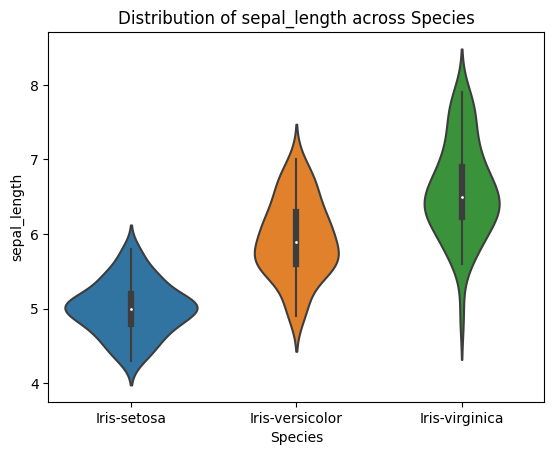

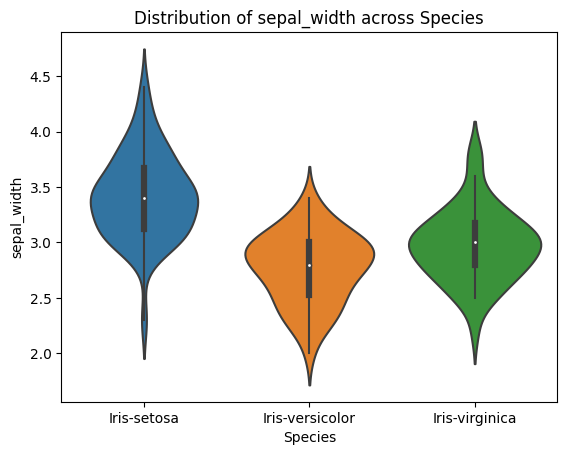

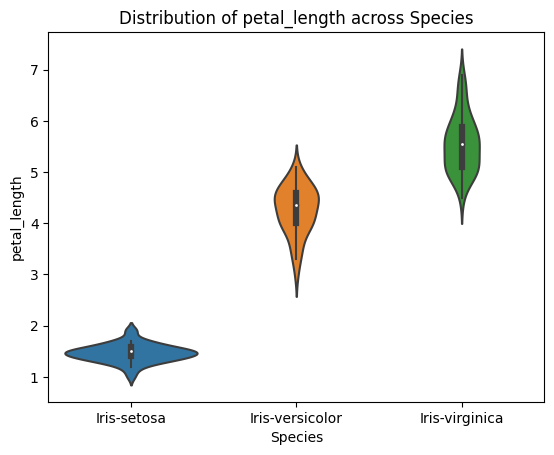

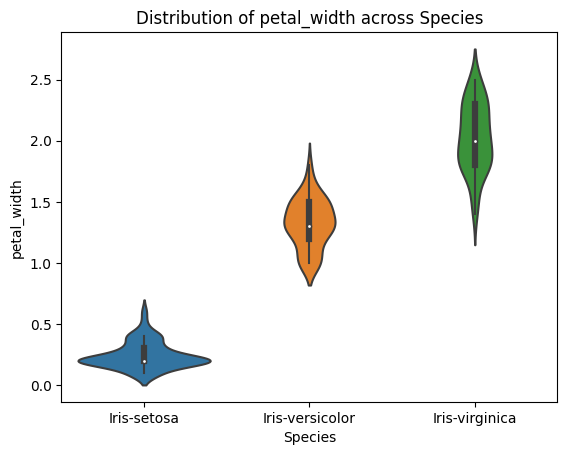

In [10]:
for feature in iris.columns[:-1]:  # Exclude the 'species' column
    sns.violinplot(x='species', y=feature, data=iris)
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} across Species')
    plt.show()

# VISUALIZATION
sepal_length, petal_width, petal_length--- iris-setosa < iris-versicolor iris-virginica

with slight overlapping at center

# Separating data

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

In [12]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
# dropping irrelevant features
X = iris.drop(['species'], axis=1)
Y = iris['species']

In [14]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Data Modelling

In [17]:
from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(x_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred2 = model2.predict(x_test)

# Testing

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
mse = mean_squared_error(y_test, y_pred2)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.0


In [20]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
